In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Introduction to clustering

## Outline

- What is clustering?
- Why is it used?
- How to evaluate it?
- How to choose a clustering algorithm?

_Question: What do you know about machine learning / data science?_

## What is clustering?

__Wikipedia__: "Cluster analysis is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)."

### Example 1: How would you group objects in the following example?
<br>
<center><img src="images/example_lego_in.png" width="500px"/></center>

## What is clustering?

__Wikipedia__: "Cluster analysis is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)."

### Example 1: Classification based on shape and color features
<br>

<center><img src="images/example_lego_out.png" width="700px"/></center>

## What is clustering?

### Clustering is Unsupervised Classification

A clustering problem is defined by a set of data points on which we don't know the labels, but that we want to group together in a smart way.

## What is clustering?

### Toy data generation

Let's generate an unsupervised dataset in 2D, composed of three natural clusters coming from different multivariate Gaussian distributions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_theme()
sns.set_context("talk")

n_points = 100
data, labels = make_blobs(n_samples=n_points, n_features=2, centers=3, cluster_std=1, center_box=[-10,10])

## What is clustering?

### Clustering problem

A set of unlabeled data points

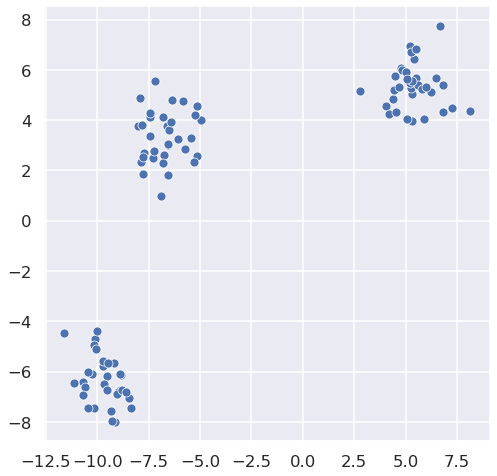

In [8]:
sns.scatterplot(x=data[:, 0], y=data[:, 1])
plt.show()

## What is clustering?

### Objective of clustering

The objective of a clustering algorithm is to retrieve the intrinsic clusters in the unsupervised data. In other words, which data point come from which distribution.

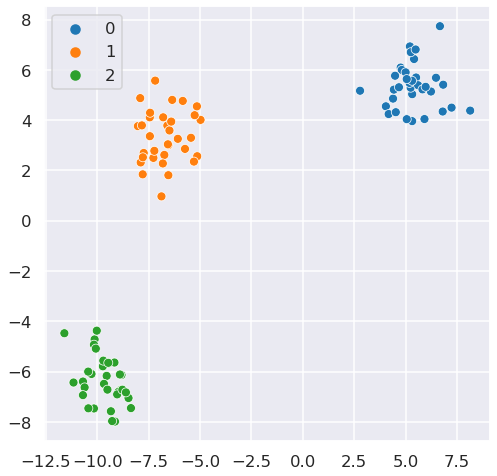

In [10]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="tab10")
plt.show()

## Features used for clustering

### Example 2: How would you group objects in the following example?
<br>
<center><img src="images/example_tools_in.png" width="500px"/><center>

## Feature used for clustering


### Example 2: Classification based on semantic features
<br>

<center><img src="images/example_tools_out.jpg" width="700px"/></center>

Why not classifying objects based on their size/weight/color? Such classifications could also be useful for different applications.

$\rightarrow$ __The choice of the characteristics, as well as the distance metrics used to compute clustering is paramount and can change drastically the results. These choices are application dependant.__

## Take-home messages

* The classification resulting from clustering depends on the __features__ used to represent entities.

## Why do we use clustering?

### Unsupervised robotic sorting
[video1](https://www.youtube.com/watch?v=NpZIwY3H-gE)

[video2](https://www.youtube.com/watch?v=korkcYs1EHM)

## Why do we use clustering?

### Recommender systems

<br>

<center><img src="images/clustering_recommender.png" width="900px"/></center>

## Why do we use clustering?

### Image segmentation: Tumor identification

<br>

<center><img src="images/tumor.jpg" width="700px"/></center>

_source: https://www.mathworks.com/matlabcentral/fileexchange/27022-image-segmentation-using-fuzzy-c-means-with-two-image-inputs_

## Why do we use clustering?

### Image segmentation: Ecological studies

<br>

<center><img src="images/forest_segmentation.png" width="900px"/></center>

_source: https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html_

## Why do we use clustering?

### Epidemiology: Covid contaminations prediction
    
> Pereira, I. G., Guerin, J. M., Silva Júnior, A. G., Garcia, G. S., Piscitelli, P., Miani, A., ... & Gonçalves, L. M. G. (2020). _Forecasting Covid-19 dynamics in Brazil: a data driven approach._ International Journal of Environmental Research and Public Health, 17(14), 5115.

## How do we evaluate clustering results?

### Internal metric:

- Silhouette coefficient
- Davies–Bouldin index
- Dunn Index

### Example internal metric: Silhouette coefficient

For a point $x_i$, which is associated to cluster $C(i)$, we note $a(i)$ the mean distance between $x_i$ and other points in $C(i)$:\
$$a(i)=\frac{1}{|C(i)|-1} \sum_{j \in C(i), j \neq i} d(x_i, x_j)$$\
and we note $b(i)$ the mean distance between $x_i$ and the points of the closest other cluster:\
$$b(i)=\min_{k \neq C(i)} \frac{1}{|C_k|}\sum_{j\in C_k} d(x_i, x_j)$$
Then, the silhouette for point $x_i$ is:
$$s(i) = \frac{b(i)-a(i)}{max(a(i), b(i))}$$
And the silhouette for the entire dataset is
$$S = \frac{1}{K} \sum_{k=1}^K \frac{1}{|C_k|} \sum_{i \in C_k} s(i)$$

### Visualize silhouette: correct clusters

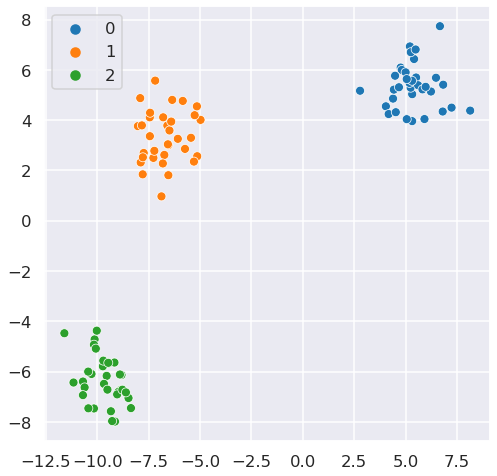

In [27]:
from sklearn.metrics import silhouette_score

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="tab10")
plt.show()

### Visualize silhouette: random clusters

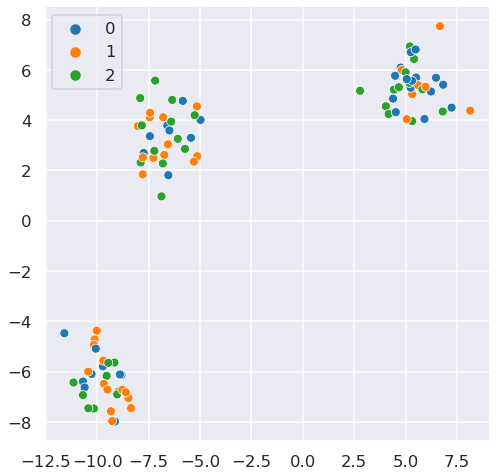

In [28]:
random_clusters = np.random.randint(0, 3, n_points)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=random_clusters, palette="tab10")
plt.show()

### Visualize silhouette: only two clusters

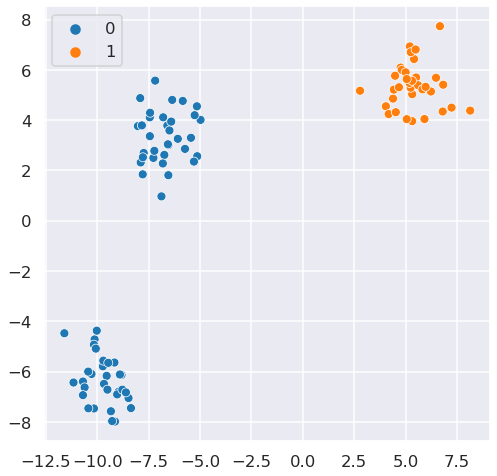

In [30]:
from sklearn.cluster import KMeans

twogroups_clusters = KMeans(2).fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=twogroups_clusters, palette="tab10")
plt.show()

### Visualize silhouette: many clusters

[ 1  4 19  3 18  1  1  9 18 10 11  6 19  3  9 11 19 13  0  7 13  1  9  4
 19 14 12  2  3  8  3  1  1  6 12  2 12 18  3  1  7  9  7 13  7 14  3  7
  8 19  4 15  4  2  5 16  5  3  5  4  3 15 10 12  3  4  6  4  2  5  1  7
 15  1 14 12  8  3 10 15 13  2 16  6  6 12 11  7 15 17  9  2  7 16 15  4
 14  3  3 13]


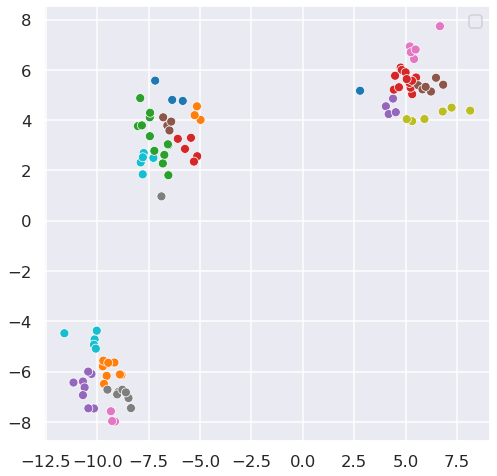

In [29]:
many_clusters = KMeans(20).fit_predict(data)
print(many_clusters)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=many_clusters, palette="tab10")
plt.legend("")
plt.show()

### Compare Silhouette scores

In [31]:
print("Silhouette true labels:     ", silhouette_score(data, labels))
print("Silhouette random clusters: ", silhouette_score(data, random_clusters))
print("Silhouette two clusters:    ", silhouette_score(data, twogroups_clusters))
print("Silhouette many clusters:   ", silhouette_score(data, many_clusters))

Silhouette true labels:      0.8433807706043503
Silhouette random clusters:  -0.07047975604578675
Silhouette two clusters:     0.6968444313918818
Silhouette many clusters:    0.4114176579541296


### External metrics

- Purity
- Clustering accuracy
- Folkes-Mallows index
- Normalized Mutual Information

### Example external metric

$\to$ Need for specific clustering metrics when ground truth is known

#### Example: Purity
Let's call $\mathcal{C}$ the clusters found, and $\mathcal{D}$ the ground truth classes:

$$purity = \frac{1}{N} \sum_{k \in \mathcal{C}} \max_{d \in D} |k \cap d|$$

_Issue: more clusters $\to$ Decreasing purity_

## Choosing a clustering algorithm

#### Different families of clustering algorithms

- Partitioning-based
- Connectivity-based
- Density-based

### Partitioning-based

#### Pros
- Can conduct inference on new data points
- Usually fast

#### Cons
- Number of clusters required
- No outlier detection
- Need access to point values

__Example:__ K-means

### Connectivity-based

#### Pros
- Does not need access to data points values (only distances)
- Can handle non linearly separated clusters

#### Cons
- Number of clusters required
- No outlier detection
- Usually slow
- Cannot conduct inference

__Example:__ Hierarchical clustering

### Density-based

#### Pros
- Does not need access to data points values
- Can handle non linearly separable clusters
- Does not need number of clusters
- Can handle outliers

#### Cons
- Usually slow
- Cannot be used for inference

__Example:__ DBSCAN

<img src="images/clusteringAlgo_comparison_scikitLearn.png" widt0h="1000px"/>